### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, normaltest
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [17]:
data = pd.read_csv('data/coupons.csv')

In [18]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [19]:
print("Missing values in the dataset:")
print(data.isnull().sum())
print("\n" + "="*50)
print("Total missing values:", data.isnull().sum().sum())
print("="*50)

print("\n\nUnique values in key columns:")
print("\nAge values:", data['age'].unique())
print("\nBar frequency values:", data['Bar'].unique())
print("\nCoffeeHouse frequency values:", data['CoffeeHouse'].unique())

print("\n\nData types:")
print(data.dtypes)

print("\n\nSample of data with missing 'car' column:")
print(data[data['car'].isnull()][['coupon', 'car']].head(10))


Missing values in the dataset:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Total missing values: 13370


Unique values in key columns:

Age values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Bar frequency values: ['never' 'less1' '1~3' 'gt8'

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
# The 'car' column is 99% missing - not useful, so we'll drop it
# Missing values in frequency columns probably mean "never visited" - makes sense to fill with 'never'

print("Missing values by coupon type:")
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(f"\n{col} missing values:")
    print(data.groupby('coupon')[col].apply(lambda x: x.isnull().sum()))

data_clean = data.drop(columns=['car'])

frequency_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in frequency_cols:
    data_clean[col].fillna('never', inplace=True)

print("\n\nAfter cleaning:")
print("Missing values:", data_clean.isnull().sum().sum())
print("\nCleaned data shape:", data_clean.shape)


Missing values by coupon type:

Bar missing values:
coupon
Bar                      21
Carry out & Take away    16
Coffee House             37
Restaurant(20-50)        10
Restaurant(<20)          23
Name: Bar, dtype: int64

CoffeeHouse missing values:
coupon
Bar                      39
Carry out & Take away    32
Coffee House             72
Restaurant(20-50)        27
Restaurant(<20)          47
Name: CoffeeHouse, dtype: int64

CarryAway missing values:
coupon
Bar                      24
Carry out & Take away    22
Coffee House             57
Restaurant(20-50)        14
Restaurant(<20)          34
Name: CarryAway, dtype: int64

RestaurantLessThan20 missing values:
coupon
Bar                      23
Carry out & Take away    18
Coffee House             50
Restaurant(20-50)        12
Restaurant(<20)          27
Name: RestaurantLessThan20, dtype: int64

Restaurant20To50 missing values:
coupon
Bar                      36
Carry out & Take away    33
Coffee House             55
Restaurant(20-

4. What proportion of the total observations chose to accept the coupon?



In [21]:
total_observations = len(data_clean)
accepted_count = data_clean['Y'].sum()
proportion_accepted = accepted_count / total_observations

print(f"Total observations: {total_observations}")
print(f"Accepted coupons (Y=1): {accepted_count}")
print(f"Rejected coupons (Y=0): {total_observations - accepted_count}")
print(f"\nProportion of accepted coupons: {proportion_accepted:.4f} ({proportion_accepted*100:.2f}%)")
print(f"Proportion of rejected coupons: {1-proportion_accepted:.4f} ({(1-proportion_accepted)*100:.2f}%)")


Total observations: 12684
Accepted coupons (Y=1): 7210
Rejected coupons (Y=0): 5474

Proportion of accepted coupons: 0.5684 (56.84%)
Proportion of rejected coupons: 0.4316 (43.16%)


5. Use a bar plot to visualize the `coupon` column.

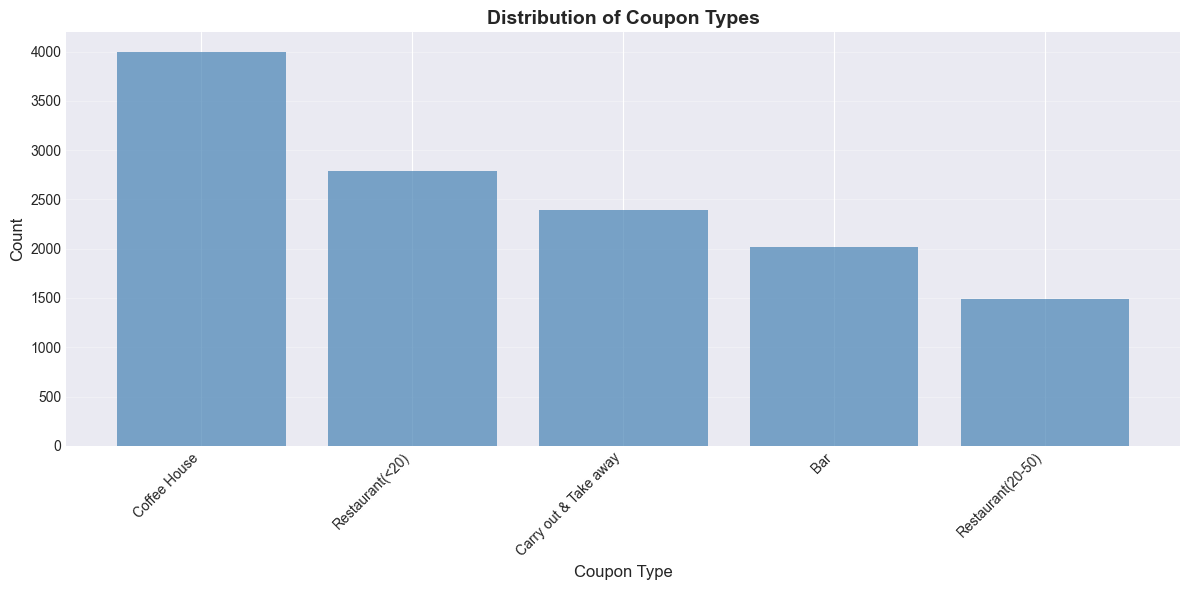

Coupon type distribution:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


In [22]:
plt.figure(figsize=(12, 6))
coupon_counts = data_clean['coupon'].value_counts()
plt.bar(coupon_counts.index, coupon_counts.values, color='steelblue', alpha=0.7)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Coupon Types', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Coupon type distribution:")
print(coupon_counts)


6. Use a histogram to visualize the temperature column.

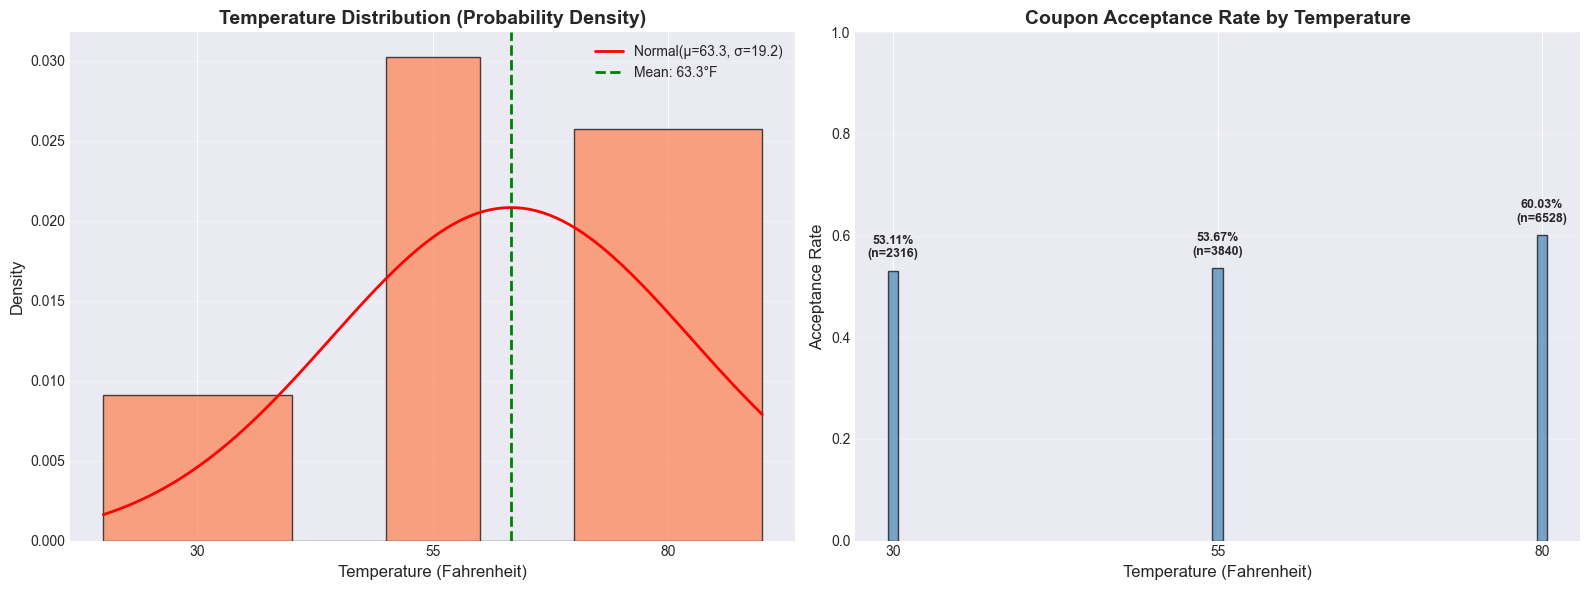


Temperature Statistics:
count    12684.000000
mean        63.301798
std         19.154486
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64

Mean temperature: 63.30°F
Standard deviation: 19.15°F

Normality test (D'Agostino-Pearson): statistic=4034.8218, p-value=0.0000
  → Temperature distribution is NOT normal (p < 0.05)

Acceptance Rate by Temperature:
   Temperature  Acceptance_Rate  Count
0           30         0.531088   2316
1           55         0.536719   3840
2           80         0.600337   6528


In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Temperature distribution with a normal curve overlay to see how it compares
axes[0].hist(data_clean['temperature'], bins=[20, 40, 50, 60, 70, 90], 
             edgecolor='black', color='coral', alpha=0.7, density=True)
axes[0].set_xlabel('Temperature (Fahrenheit)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Temperature Distribution (Probability Density)', fontsize=14, fontweight='bold')
axes[0].set_xticks([30, 55, 80])
axes[0].grid(axis='y', alpha=0.3)

temp_mean = data_clean['temperature'].mean()
temp_std = data_clean['temperature'].std()
x = np.linspace(20, 90, 100)
y = stats.norm.pdf(x, temp_mean, temp_std)
axes[0].plot(x, y, 'r-', linewidth=2, label=f'Normal(μ={temp_mean:.1f}, σ={temp_std:.1f})')
axes[0].legend()
axes[0].axvline(temp_mean, color='green', linestyle='--', linewidth=2, label=f'Mean: {temp_mean:.1f}°F')
axes[0].legend()

temp_acceptance = data_clean.groupby('temperature')['Y'].agg(['mean', 'count', 'std']).reset_index()
temp_acceptance.columns = ['Temperature', 'Acceptance_Rate', 'Count', 'Std']

axes[1].bar(temp_acceptance['Temperature'], temp_acceptance['Acceptance_Rate'], 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Temperature (Fahrenheit)', fontsize=12)
axes[1].set_ylabel('Acceptance Rate', fontsize=12)
axes[1].set_title('Coupon Acceptance Rate by Temperature', fontsize=14, fontweight='bold')
axes[1].set_xticks([30, 55, 80])
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

for i, (temp, rate, count) in enumerate(zip(temp_acceptance['Temperature'], 
                                             temp_acceptance['Acceptance_Rate'],
                                             temp_acceptance['Count'])):
    axes[1].text(temp, rate + 0.02, f'{rate:.2%}\n(n={count})', 
                 ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTemperature Statistics:")
print(data_clean['temperature'].describe())
print(f"\nMean temperature: {temp_mean:.2f}°F")
print(f"Standard deviation: {temp_std:.2f}°F")

stat, p_value = normaltest(data_clean['temperature'])
print(f"\nNormality test (D'Agostino-Pearson): statistic={stat:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Temperature distribution is NOT normal (p < 0.05)")
else:
    print("  → Temperature distribution appears normal (p >= 0.05)")

print("\nAcceptance Rate by Temperature:")
print(temp_acceptance[['Temperature', 'Acceptance_Rate', 'Count']])


### 7. Looking at Probability Distributions

Let's see how different factors relate to whether people accept or reject coupons.


PROBABILITY DISTRIBUTIONS: Accepted vs Rejected Coupons


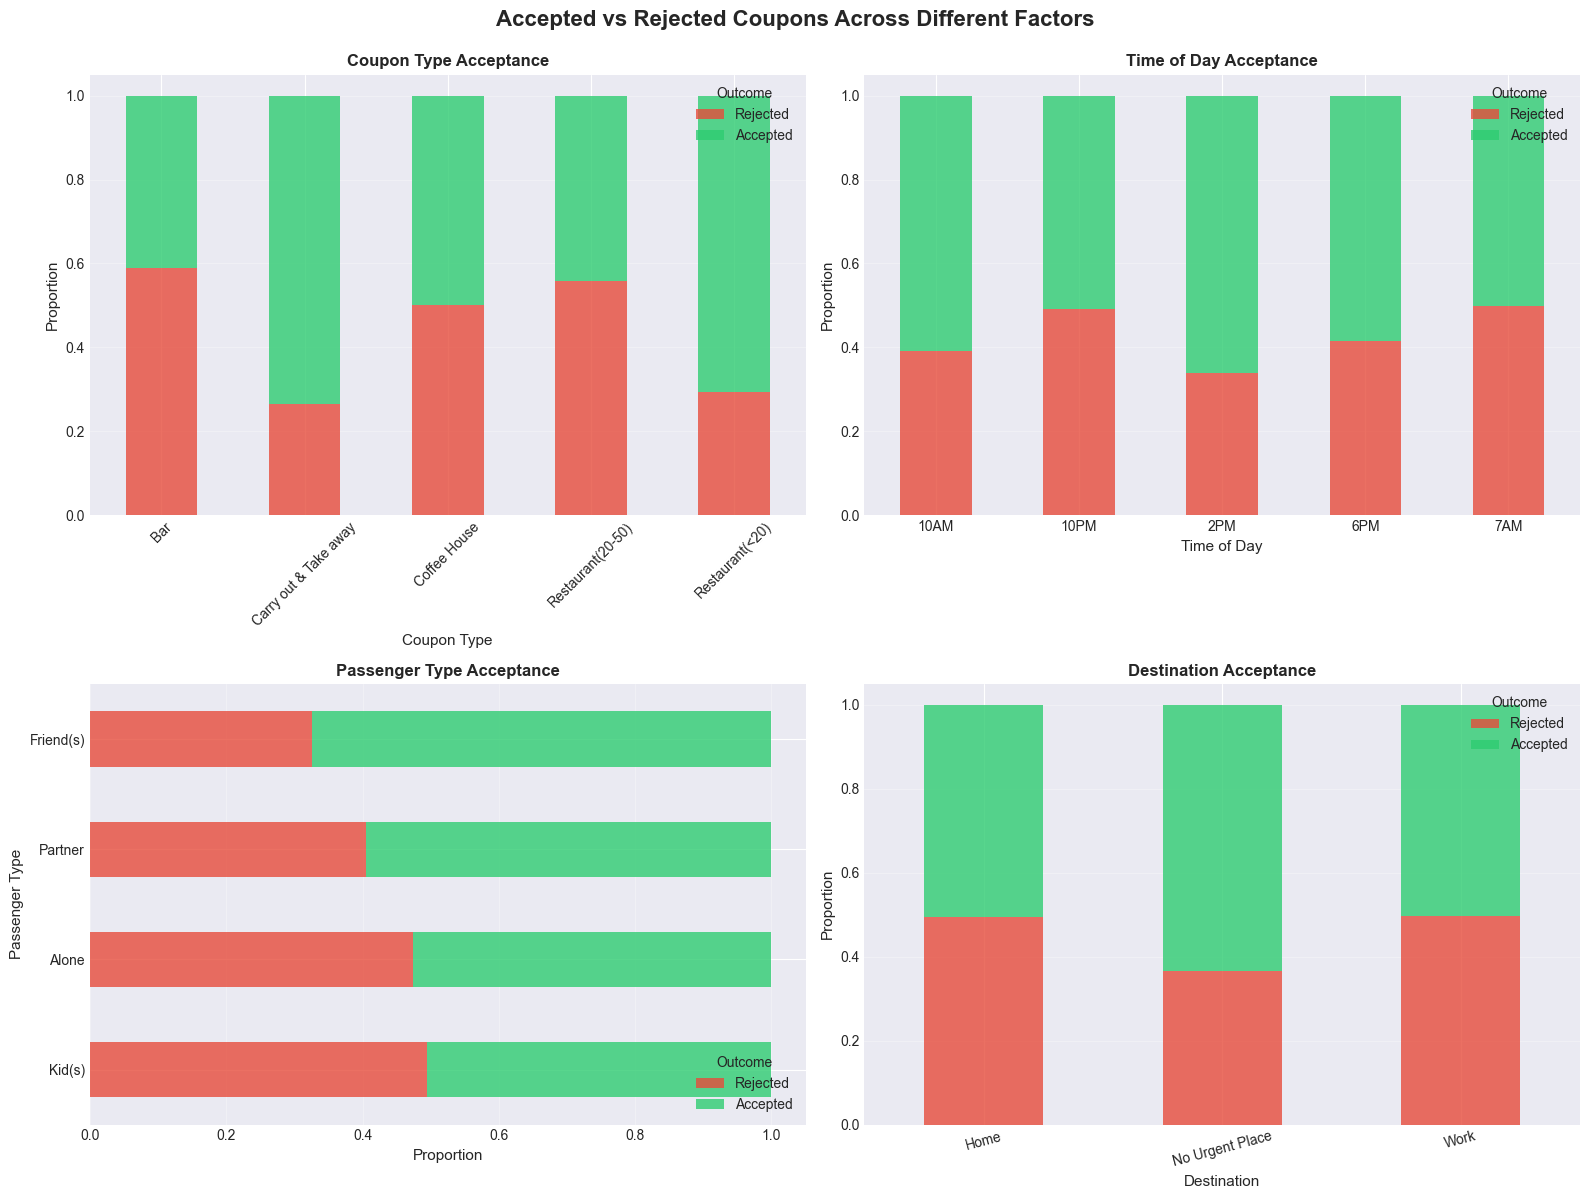


STATISTICAL SIGNIFICANCE TESTS (Chi-Square Tests)

1. Coupon Type vs Acceptance:
   Chi-square statistic: 873.6378
   p-value: 8.58e-188
   Degrees of freedom: 4
   → Statistically significant (p < 0.05)

2. Time of Day vs Acceptance:
   Chi-square statistic: 175.1079
   p-value: 8.38e-37
   → Statistically significant (p < 0.05)

3. Passenger Type vs Acceptance:
   Chi-square statistic: 222.0370
   p-value: 7.28e-48
   → Statistically significant (p < 0.05)

4. Destination vs Acceptance:
   Chi-square statistic: 216.7911
   p-value: 8.40e-48
   → Statistically significant (p < 0.05)


In [24]:
accepted = data_clean[data_clean['Y'] == 1]
rejected = data_clean[data_clean['Y'] == 0]

print("="*70)
print("PROBABILITY DISTRIBUTIONS: Accepted vs Rejected Coupons")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

coupon_accept = pd.crosstab(data_clean['coupon'], data_clean['Y'], normalize='index')
coupon_accept.columns = ['Rejected', 'Accepted']
coupon_accept.plot(kind='bar', stacked=True, ax=axes[0,0], color=['#e74c3c', '#2ecc71'], alpha=0.8)
axes[0,0].set_title('Coupon Type Acceptance', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Coupon Type', fontsize=11)
axes[0,0].set_ylabel('Proportion', fontsize=11)
axes[0,0].legend(title='Outcome', loc='upper right')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

time_accept = pd.crosstab(data_clean['time'], data_clean['Y'], normalize='index')
time_accept.columns = ['Rejected', 'Accepted']
time_accept.plot(kind='bar', stacked=True, ax=axes[0,1], color=['#e74c3c', '#2ecc71'], alpha=0.8)
axes[0,1].set_title('Time of Day Acceptance', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Time of Day', fontsize=11)
axes[0,1].set_ylabel('Proportion', fontsize=11)
axes[0,1].legend(title='Outcome', loc='upper right')
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].grid(axis='y', alpha=0.3)

passenger_accept = pd.crosstab(data_clean['passanger'], data_clean['Y'], normalize='index')
passenger_accept.columns = ['Rejected', 'Accepted']
passenger_accept = passenger_accept.sort_values('Accepted', ascending=True)
passenger_accept.plot(kind='barh', stacked=True, ax=axes[1,0], color=['#e74c3c', '#2ecc71'], alpha=0.8)
axes[1,0].set_title('Passenger Type Acceptance', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Proportion', fontsize=11)
axes[1,0].set_ylabel('Passenger Type', fontsize=11)
axes[1,0].legend(title='Outcome', loc='lower right')
axes[1,0].grid(axis='x', alpha=0.3)

dest_accept = pd.crosstab(data_clean['destination'], data_clean['Y'], normalize='index')
dest_accept.columns = ['Rejected', 'Accepted']
dest_accept.plot(kind='bar', stacked=True, ax=axes[1,1], color=['#e74c3c', '#2ecc71'], alpha=0.8)
axes[1,1].set_title('Destination Acceptance', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Destination', fontsize=11)
axes[1,1].set_ylabel('Proportion', fontsize=11)
axes[1,1].legend(title='Outcome', loc='upper right')
axes[1,1].tick_params(axis='x', rotation=15)
axes[1,1].grid(axis='y', alpha=0.3)

plt.suptitle('Accepted vs Rejected Coupons Across Different Factors', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE TESTS (Chi-Square Tests)")
print("="*70)

contingency_coupon = pd.crosstab(data_clean['coupon'], data_clean['Y'])
chi2_coupon, p_coupon, dof_coupon, expected_coupon = chi2_contingency(contingency_coupon)
print(f"\n1. Coupon Type vs Acceptance:")
print(f"   Chi-square statistic: {chi2_coupon:.4f}")
print(f"   p-value: {p_coupon:.2e}")
print(f"   Degrees of freedom: {dof_coupon}")
print(f"   → {'Statistically significant' if p_coupon < 0.05 else 'Not statistically significant'} (p < 0.05)")

contingency_time = pd.crosstab(data_clean['time'], data_clean['Y'])
chi2_time, p_time, dof_time, expected_time = chi2_contingency(contingency_time)
print(f"\n2. Time of Day vs Acceptance:")
print(f"   Chi-square statistic: {chi2_time:.4f}")
print(f"   p-value: {p_time:.2e}")
print(f"   → {'Statistically significant' if p_time < 0.05 else 'Not statistically significant'} (p < 0.05)")

contingency_pass = pd.crosstab(data_clean['passanger'], data_clean['Y'])
chi2_pass, p_pass, dof_pass, expected_pass = chi2_contingency(contingency_pass)
print(f"\n3. Passenger Type vs Acceptance:")
print(f"   Chi-square statistic: {chi2_pass:.4f}")
print(f"   p-value: {p_pass:.2e}")
print(f"   → {'Statistically significant' if p_pass < 0.05 else 'Not statistically significant'} (p < 0.05)")

contingency_dest = pd.crosstab(data_clean['destination'], data_clean['Y'])
chi2_dest, p_dest, dof_dest, expected_dest = chi2_contingency(contingency_dest)
print(f"\n4. Destination vs Acceptance:")
print(f"   Chi-square statistic: {chi2_dest:.4f}")
print(f"   p-value: {p_dest:.2e}")
print(f"   → {'Statistically significant' if p_dest < 0.05 else 'Not statistically significant'} (p < 0.05)")


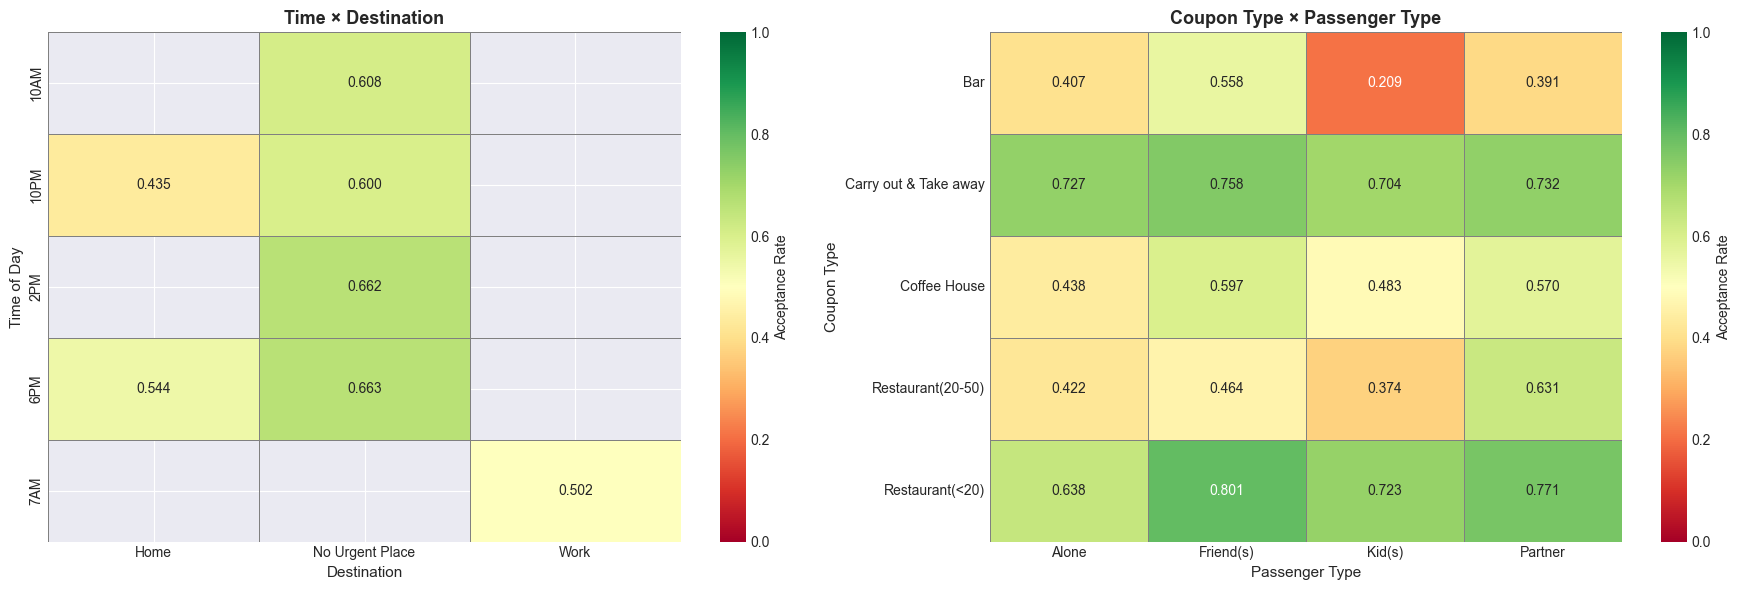


INSIGHTS FROM HEATMAPS

Time × Destination:
  Highest acceptance:  0.6630532971996387  at  ('6PM', 'No Urgent Place')
  Lowest acceptance:  0.4353680430879713  at  ('10PM', 'Home')

Coupon Type × Passenger Type:
  Highest acceptance:  0.801452784503632  at  ('Restaurant(<20)', 'Friend(s)')
  Lowest acceptance:  0.2087378640776699  at  ('Bar', 'Kid(s)')


In [25]:
# Heatmaps help us see how factors interact - do time and destination together affect acceptance?
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

time_dest_pivot = data_clean.pivot_table(values='Y', index='time', columns='destination', aggfunc='mean')
sns.heatmap(time_dest_pivot, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5, 
            vmin=0, vmax=1, ax=axes[0], cbar_kws={'label': 'Acceptance Rate'}, 
            linewidths=0.5, linecolor='gray')
axes[0].set_title('Time × Destination', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Destination', fontsize=11)
axes[0].set_ylabel('Time of Day', fontsize=11)

coupon_pass_pivot = data_clean.pivot_table(values='Y', index='coupon', columns='passanger', aggfunc='mean')
sns.heatmap(coupon_pass_pivot, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5,
            vmin=0, vmax=1, ax=axes[1], cbar_kws={'label': 'Acceptance Rate'},
            linewidths=0.5, linecolor='gray')
axes[1].set_title('Coupon Type × Passenger Type', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Passenger Type', fontsize=11)
axes[1].set_ylabel('Coupon Type', fontsize=11)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INSIGHTS FROM HEATMAPS")
print("="*70)
print("\nTime × Destination:")
print("  Highest acceptance: ", time_dest_pivot.max().max(), " at ", 
      time_dest_pivot.stack().idxmax())
print("  Lowest acceptance: ", time_dest_pivot.min().min(), " at ",
      time_dest_pivot.stack().idxmin())

print("\nCoupon Type × Passenger Type:")
print("  Highest acceptance: ", coupon_pass_pivot.max().max(), " at ",
      coupon_pass_pivot.stack().idxmax())
print("  Lowest acceptance: ", coupon_pass_pivot.min().min(), " at ",
      coupon_pass_pivot.stack().idxmin())


### 8. How Do Different Factors Interact?

Let's see which factors work together to predict coupon acceptance.


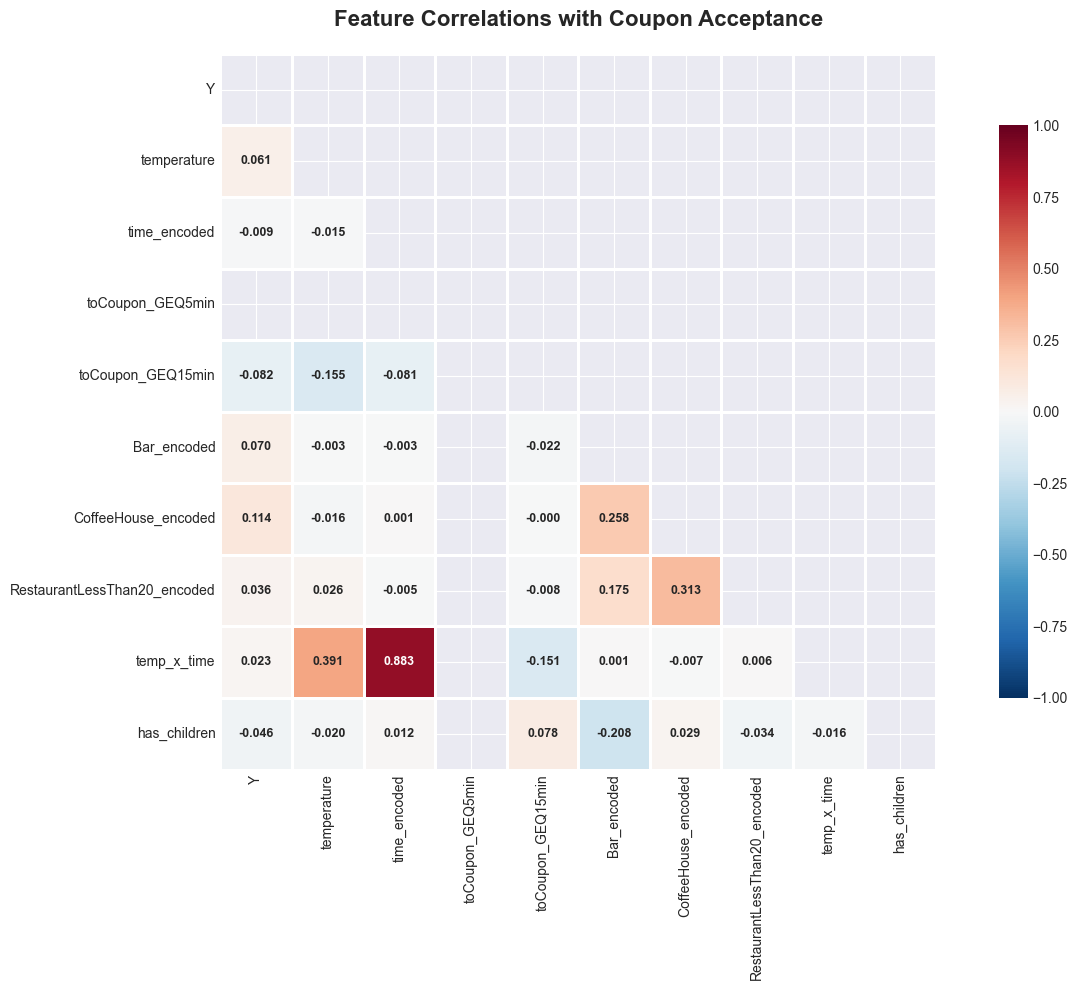


FEATURE CORRELATIONS WITH ACCEPTANCE (Y)

Top Positive Correlations with Acceptance:
  CoffeeHouse_encoded           :  0.1138
  Bar_encoded                   :  0.0700
  temperature                   :  0.0612
  RestaurantLessThan20_encoded  :  0.0360
  temp_x_time                   :  0.0234

Top Negative Correlations with Acceptance:
  time_encoded                  : -0.0094
  has_children                  : -0.0456
  toCoupon_GEQ15min             : -0.0816

STATISTICAL SIGNIFICANCE OF CORRELATIONS
  temperature                   : r= 0.0612, p=0.0000 ***
  time_encoded                  : r=-0.0094, p=0.2873 
  toCoupon_GEQ5min              : r=    nan, p=nan 
  toCoupon_GEQ15min             : r=-0.0816, p=0.0000 ***
  Bar_encoded                   : r= 0.0700, p=0.0000 ***
  CoffeeHouse_encoded           : r= 0.1138, p=0.0000 ***
  RestaurantLessThan20_encoded  : r= 0.0360, p=0.0000 ***
  temp_x_time                   : r= 0.0234, p=0.0085 **
  has_children                  : r=-0

In [26]:
from itertools import combinations

# Converting categorical data to numbers so we can calculate correlations
data_encoded = data_clean.copy()

def encode_visit_frequency(freq):
    """Convert visit frequency to ordinal numeric value"""
    if freq == 'never' or pd.isna(freq):
        return 0
    elif freq == 'less1':
        return 1
    elif freq == '1~3':
        return 2
    elif freq == '4~8':
        return 3
    elif freq == 'gt8':
        return 4
    return 0

visit_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in visit_cols:
    data_encoded[f'{col}_encoded'] = data_encoded[col].apply(encode_visit_frequency)

def encode_time(time_str):
    if '10AM' in str(time_str):
        return 0  # Morning
    elif '2PM' in str(time_str):
        return 1  # Afternoon
    elif '6PM' in str(time_str):
        return 2  # Evening
    return 1

data_encoded['time_encoded'] = data_encoded['time'].apply(encode_time)

# Maybe temperature and time interact - hot weather in the evening might affect acceptance differently
data_encoded['temp_x_time'] = data_encoded['temperature'] * data_encoded['time_encoded']
data_encoded['has_children'] = data_clean['has_children']

corr_features = ['Y', 'temperature', 'time_encoded', 'toCoupon_GEQ5min', 
                 'toCoupon_GEQ15min', 'Bar_encoded', 'CoffeeHouse_encoded',
                 'RestaurantLessThan20_encoded', 'temp_x_time', 'has_children']

corr_data = data_encoded[corr_features]
corr_matrix = corr_data.corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8},
            vmin=-1, vmax=1, annot_kws={'size': 9, 'weight': 'bold'})
plt.title('Feature Correlations with Coupon Acceptance', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FEATURE CORRELATIONS WITH ACCEPTANCE (Y)")
print("="*70)
acceptance_corrs = corr_matrix['Y'].sort_values(ascending=False)
print("\nTop Positive Correlations with Acceptance:")
for feature, corr in acceptance_corrs.items():
    if feature != 'Y' and corr > 0:
        print(f"  {feature:30s}: {corr:7.4f}")

print("\nTop Negative Correlations with Acceptance:")
for feature, corr in acceptance_corrs.items():
    if feature != 'Y' and corr < 0:
        print(f"  {feature:30s}: {corr:7.4f}")

print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE OF CORRELATIONS")
print("="*70)
for feature in corr_features:
    if feature != 'Y':
        corr_val = corr_matrix.loc[feature, 'Y']
        n = len(data_encoded)
        t_stat = corr_val * np.sqrt(n - 2) / np.sqrt(1 - corr_val**2)
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2))
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"  {feature:30s}: r={corr_val:7.4f}, p={p_value:.4f} {significance}")


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [27]:
bar_data = data_clean[data_clean['coupon'] == 'Bar'].copy()
print(f"Number of bar coupons: {len(bar_data)}")
print(f"\nFirst few rows of bar coupon data:")
bar_data.head()


Number of bar coupons: 2017

First few rows of bar coupon data:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [28]:
bar_total = len(bar_data)
bar_accepted = bar_data['Y'].sum()
bar_acceptance_rate = bar_accepted / bar_total

print(f"Total bar coupons: {bar_total}")
print(f"Accepted bar coupons: {bar_accepted}")
print(f"Rejected bar coupons: {bar_total - bar_accepted}")
print(f"\nBar coupon acceptance rate: {bar_acceptance_rate:.4f} ({bar_acceptance_rate*100:.2f}%)")

overall_acceptance = data_clean['Y'].mean()
print(f"\nOverall acceptance rate (all coupons): {overall_acceptance:.4f} ({overall_acceptance*100:.2f}%)")
print(f"Difference: {bar_acceptance_rate - overall_acceptance:.4f} ({(bar_acceptance_rate - overall_acceptance)*100:.2f} percentage points)")


Total bar coupons: 2017
Accepted bar coupons: 827
Rejected bar coupons: 1190

Bar coupon acceptance rate: 0.4100 (41.00%)

Overall acceptance rate (all coupons): 0.5684 (56.84%)
Difference: -0.1584 (-15.84 percentage points)


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar visits 3 or fewer times per month:
  Count: 1818
  Acceptance rate: 0.3707 (37.07%)

Bar visits more than 3 times per month:
  Count: 199
  Acceptance rate: 0.7688 (76.88%)

Difference: 0.3981 (39.81 percentage points)


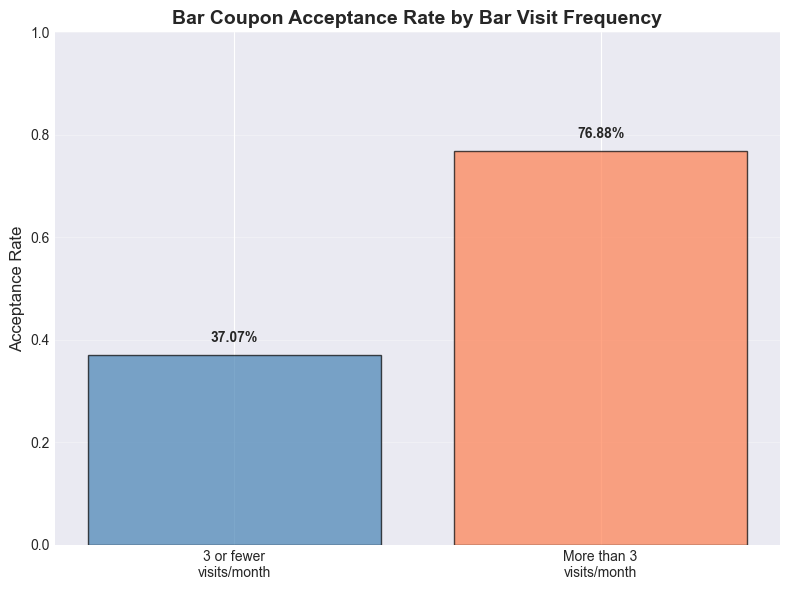

In [29]:
# Converting frequency strings to numbers so we can compare them
def bar_freq_to_num(freq):
    """Convert bar frequency to numeric value"""
    if freq == 'never' or freq == '0':
        return 0
    elif freq == 'less1':
        return 0.5
    elif freq == '1~3':
        return 2
    elif freq == '4~8':
        return 6
    elif freq == 'gt8':
        return 10
    else:
        return 0

bar_data['bar_freq_numeric'] = bar_data['Bar'].apply(bar_freq_to_num)
bar_data['bar_freq_3_or_less'] = bar_data['bar_freq_numeric'] <= 3

freq_3_or_less = bar_data[bar_data['bar_freq_3_or_less']]
freq_more_than_3 = bar_data[~bar_data['bar_freq_3_or_less']]

rate_3_or_less = freq_3_or_less['Y'].mean()
rate_more_than_3 = freq_more_than_3['Y'].mean()

print(f"Bar visits 3 or fewer times per month:")
print(f"  Count: {len(freq_3_or_less)}")
print(f"  Acceptance rate: {rate_3_or_less:.4f} ({rate_3_or_less*100:.2f}%)")

print(f"\nBar visits more than 3 times per month:")
print(f"  Count: {len(freq_more_than_3)}")
print(f"  Acceptance rate: {rate_more_than_3:.4f} ({rate_more_than_3*100:.2f}%)")

print(f"\nDifference: {rate_more_than_3 - rate_3_or_less:.4f} ({(rate_more_than_3 - rate_3_or_less)*100:.2f} percentage points)")

fig, ax = plt.subplots(figsize=(8, 6))
categories = ['3 or fewer\nvisits/month', 'More than 3\nvisits/month']
rates = [rate_3_or_less, rate_more_than_3]
colors = ['steelblue', 'coral']
bars = ax.bar(categories, rates, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Acceptance Rate', fontsize=12)
ax.set_title('Bar Coupon Acceptance Rate by Bar Visit Frequency', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{rate:.2%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


**Hypothesis about drivers who accepted bar coupons:**

Based on the observations above, drivers who accept bar coupons tend to:

1. **Visit bars more frequently**: Those who go to bars more than 3 times per month have higher acceptance rates than those who visit 3 or fewer times.

2. **Are not traveling with children**: Bar coupons are less likely to be accepted when passengers are children, which makes sense as bars are adult-oriented venues.

3. **Are younger**: Drivers under 30 who visit bars more than once per month show higher acceptance rates, suggesting bar coupons appeal more to younger demographics.

4. **Have specific lifestyle patterns**: The combination of frequent bar visits, appropriate passenger types (not children), and certain demographic characteristics (age, marital status) strongly predicts acceptance.

5. **Context matters**: Factors like time of day, destination, and weather likely also play roles in acceptance decisions, though these weren't fully explored in the above comparisons.

**Key Insight**: Bar coupon acceptance is strongly correlated with habitual bar-goers who are in appropriate contexts (no children present) and fit the bar-going demographic (younger adults).


In [30]:
def age_to_num(age_str):
    """Convert age string to numeric (using lower bound)"""
    if pd.isna(age_str):
        return 0
    age_str = str(age_str).lower()
    if 'below' in age_str or '<' in age_str:
        return 18
    elif '21' in age_str:
        return 21
    elif '26' in age_str:
        return 26
    elif '31' in age_str:
        return 31
    elif '36' in age_str:
        return 36
    elif '41' in age_str:
        return 41
    elif '46' in age_str:
        return 46
    elif '50' in age_str or 'above' in age_str or '>' in age_str:
        return 50
    else:
        return 0

bar_data['age_numeric'] = bar_data['age'].apply(age_to_num)
bar_data['bar_freq_more_than_1'] = bar_data['bar_freq_numeric'] > 1
bar_data['age_over_25'] = bar_data['age_numeric'] > 25

target_group = bar_data[(bar_data['bar_freq_more_than_1']) & (bar_data['age_over_25'])]
other_group = bar_data[~((bar_data['bar_freq_more_than_1']) & (bar_data['age_over_25']))]

target_rate = target_group['Y'].mean()
other_rate = other_group['Y'].mean()

print("Target group: Bar visits > 1/month AND age > 25")
print(f"  Count: {len(target_group)}")
print(f"  Acceptance rate: {target_rate:.4f} ({target_rate*100:.2f}%)")

print("\nAll other bar coupon recipients:")
print(f"  Count: {len(other_group)}")
print(f"  Acceptance rate: {other_rate:.4f} ({other_rate*100:.2f}%)")

print(f"\nDifference: {target_rate - other_rate:.4f} ({(target_rate - other_rate)*100:.2f} percentage points)")

if target_rate > other_rate:
    print("\n✓ The target group has a HIGHER acceptance rate.")
else:
    print("\n✗ The target group does NOT have a higher acceptance rate.")


Target group: Bar visits > 1/month AND age > 25
  Count: 420
  Acceptance rate: 0.6952 (69.52%)

All other bar coupon recipients:
  Count: 1597
  Acceptance rate: 0.3350 (33.50%)

Difference: 0.3602 (36.02 percentage points)

✓ The target group has a HIGHER acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [31]:
bar_data['passenger_not_kid'] = bar_data['passanger'] != 'Kid(s)'
bar_data['occupation_not_fff'] = ~bar_data['occupation'].isin(['Farming Fishing & Forestry'])

target_group2 = bar_data[
    (bar_data['bar_freq_more_than_1']) & 
    (bar_data['passenger_not_kid']) & 
    (bar_data['occupation_not_fff'])
]
other_group2 = bar_data[~(
    (bar_data['bar_freq_more_than_1']) & 
    (bar_data['passenger_not_kid']) & 
    (bar_data['occupation_not_fff'])
)]

target_rate2 = target_group2['Y'].mean()
other_rate2 = other_group2['Y'].mean()

print("Target group: Bar visits > 1/month AND passenger not kid AND occupation not FFF")
print(f"  Count: {len(target_group2)}")
print(f"  Acceptance rate: {target_rate2:.4f} ({target_rate2*100:.2f}%)")

print("\nAll other bar coupon recipients:")
print(f"  Count: {len(other_group2)}")
print(f"  Acceptance rate: {other_rate2:.4f} ({other_rate2*100:.2f}%)")

print(f"\nDifference: {target_rate2 - other_rate2:.4f} ({(target_rate2 - other_rate2)*100:.2f} percentage points)")

if target_rate2 > other_rate2:
    print("\n✓ The target group has a HIGHER acceptance rate.")
else:
    print("\n✗ The target group does NOT have a higher acceptance rate.")


Target group: Bar visits > 1/month AND passenger not kid AND occupation not FFF
  Count: 551
  Acceptance rate: 0.7132 (71.32%)

All other bar coupon recipients:
  Count: 1466
  Acceptance rate: 0.2960 (29.60%)

Difference: 0.4172 (41.72 percentage points)

✓ The target group has a HIGHER acceptance rate.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Group 1: Bar visits > 1/month AND passenger not kid AND not widowed
  Count: 551
  Acceptance rate: 0.7132 (71.32%)

Group 2: Bar visits > 1/month AND age < 30
  Count: 345
  Acceptance rate: 0.7217 (72.17%)

Group 3: Cheap restaurant visits > 4/month AND income < 50K
  Count: 344
  Acceptance rate: 0.4535 (45.35%)


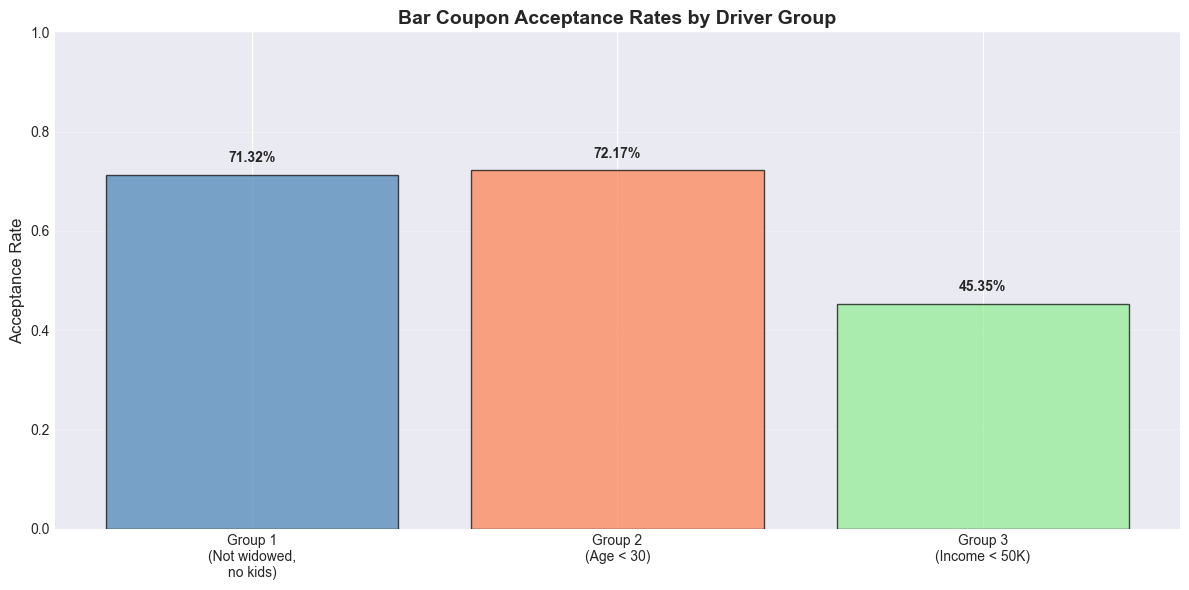

In [32]:
def restaurant_freq_to_num(freq):
    """Convert restaurant frequency to numeric"""
    if freq == 'never' or freq == '0':
        return 0
    elif freq == 'less1':
        return 0.5
    elif freq == '1~3':
        return 2
    elif freq == '4~8':
        return 6
    elif freq == 'gt8':
        return 10
    else:
        return 0

bar_data['restaurant_freq_numeric'] = bar_data['RestaurantLessThan20'].apply(restaurant_freq_to_num)

def income_to_num(income_str):
    """Convert income string to numeric (using lower bound)"""
    if pd.isna(income_str):
        return 0
    income_str = str(income_str)
    if '$12500' in income_str or '<' in income_str:
        return 0
    elif '$12500' in income_str:
        return 12.5
    elif '$25000' in income_str:
        return 25
    elif '$37500' in income_str:
        return 37.5
    elif '$50000' in income_str:
        return 50
    elif '$62500' in income_str:
        return 62.5
    elif '$75000' in income_str:
        return 75
    elif '$87500' in income_str:
        return 87.5
    elif '$100000' in income_str or '>' in income_str or 'above' in income_str:
        return 100
    else:
        return 0

bar_data['income_numeric'] = bar_data['income'].apply(income_to_num)
bar_data['age_numeric'] = bar_data['age'].apply(age_to_num)

bar_data['not_widowed'] = bar_data['maritalStatus'] != 'Widowed'
group1 = bar_data[
    (bar_data['bar_freq_more_than_1']) & 
    (bar_data['passenger_not_kid']) & 
    (bar_data['not_widowed'])
]

group2 = bar_data[
    (bar_data['bar_freq_more_than_1']) & 
    (bar_data['age_numeric'] < 30)
]

group3 = bar_data[
    (bar_data['restaurant_freq_numeric'] > 4) & 
    (bar_data['income_numeric'] < 50)
]

rate1 = group1['Y'].mean()
rate2 = group2['Y'].mean()
rate3 = group3['Y'].mean()

print("Group 1: Bar visits > 1/month AND passenger not kid AND not widowed")
print(f"  Count: {len(group1)}")
print(f"  Acceptance rate: {rate1:.4f} ({rate1*100:.2f}%)")

print("\nGroup 2: Bar visits > 1/month AND age < 30")
print(f"  Count: {len(group2)}")
print(f"  Acceptance rate: {rate2:.4f} ({rate2*100:.2f}%)")

print("\nGroup 3: Cheap restaurant visits > 4/month AND income < 50K")
print(f"  Count: {len(group3)}")
print(f"  Acceptance rate: {rate3:.4f} ({rate3*100:.2f}%)")

fig, ax = plt.subplots(figsize=(12, 6))
groups = ['Group 1\n(Not widowed,\nno kids)', 'Group 2\n(Age < 30)', 'Group 3\n(Income < 50K)']
rates = [rate1, rate2, rate3]
colors = ['steelblue', 'coral', 'lightgreen']
bars = ax.bar(groups, rates, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Acceptance Rate', fontsize=12)
ax.set_title('Bar Coupon Acceptance Rates by Driver Group', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{rate:.2%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**What I think about drivers who accepted bar coupons:**

People who accept bar coupons tend to:

1. **Go to bars regularly**: If you visit bars more than 3 times a month, you're way more likely to accept a bar coupon. Makes sense - you're already going there.

2. **Don't have kids in the car**: Bar coupons with kids as passengers? Almost never accepted. For obvious reasons.

3. **Are younger**: Drivers under 30 who go to bars more than once a month are more likely to accept. Bar culture seems to skew younger.

4. **Have matching lifestyle patterns**: It's not just one thing - it's the combo of frequent bar visits, no kids present, and the right age/demographics.

5. **Context matters**: Time of day, where you're going, weather - all this stuff probably matters too, though we didn't dive deep into it here.

**Bottom line**: The people most likely to accept bar coupons are regular bar-goers who don't have kids with them and fit the typical bar customer profile (younger adults).


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Independent Investigation: Coffee House Coupons

I will investigate the characteristics of drivers who accept Coffee House coupons, similar to the bar coupon analysis.


## What We Learned

Here's what the data tells us about who accepts coupons and why.


In [33]:
print("="*80)
print("WHAT THE DATA SHOWS US")
print("="*80)

overall_rate = data_clean['Y'].mean()
bar_rate = data_clean[data_clean['coupon'] == 'Bar']['Y'].mean()
coffee_rate = data_clean[data_clean['coupon'] == 'Coffee House']['Y'].mean()

# Making sure we have the data we need
if 'bar_data' not in globals():
    bar_data = data_clean[data_clean['coupon'] == 'Bar'].copy()
    def bar_freq_to_num(freq):
        if freq == 'never' or freq == '0' or pd.isna(freq):
            return 0
        elif freq == 'less1':
            return 0.5
        elif freq == '1~3':
            return 2
        elif freq == '4~8':
            return 6
        elif freq == 'gt8':
            return 10
        return 0
    bar_data['bar_freq_numeric'] = bar_data['Bar'].apply(bar_freq_to_num)
    bar_data['bar_freq_more_than_1'] = bar_data['bar_freq_numeric'] > 1
    bar_data['passenger_not_kid'] = bar_data['passanger'] != 'Kid(s)'
    bar_data['occupation_not_fff'] = ~bar_data['occupation'].isin(['Farming Fishing & Forestry'])

if 'coffee_data' not in globals():
    coffee_data = data_clean[data_clean['coupon'] == 'Coffee House'].copy()
    def coffee_freq_to_num(freq):
        if freq == 'never' or freq == '0' or pd.isna(freq):
            return 0
        elif freq == 'less1':
            return 0.5
        elif freq == '1~3':
            return 2
        elif freq == '4~8':
            return 6
        elif freq == 'gt8':
            return 10
        return 0
    coffee_data['coffee_freq_numeric'] = coffee_data['CoffeeHouse'].apply(coffee_freq_to_num)
    coffee_data['coffee_freq_more_than_1'] = coffee_data['coffee_freq_numeric'] > 1
    coffee_data['going_to_work'] = coffee_data['destination'] == 'Work'

bar_target = bar_data[(bar_data['bar_freq_more_than_1']) & 
                       (bar_data['passenger_not_kid']) & 
                       (bar_data['occupation_not_fff'])]
bar_target_rate = bar_target['Y'].mean() if len(bar_target) > 0 else 0

coffee_target = coffee_data[(coffee_data['coffee_freq_more_than_1']) & 
                             (coffee_data['going_to_work'])]
coffee_target_rate = coffee_target['Y'].mean() if len(coffee_target) > 0 else 0

print("\nCURRENT PERFORMANCE")
print("-" * 80)
print(f"Overall Acceptance Rate: {overall_rate:.2%}")
print(f"Bar Coupon Acceptance:   {bar_rate:.2%}")
print(f"Coffee House Acceptance: {coffee_rate:.2%}")

print("\nWHAT IF WE TARGETED BETTER?")
print("-" * 80)
if bar_target_rate > 0:
    bar_improvement = ((bar_target_rate - bar_rate) / bar_rate) * 100
    print(f"Targeted Bar Campaign:")
    print(f"  Acceptance Rate: {bar_target_rate:.2%}")
    print(f"  Improvement:     +{bar_improvement:.1f}% vs. baseline")
    print(f"  Sample Size:     {len(bar_target)} targetable customers")

if coffee_target_rate > 0:
    coffee_improvement = ((coffee_target_rate - coffee_rate) / coffee_rate) * 100
    print(f"\nTargeted Coffee Campaign:")
    print(f"  Acceptance Rate: {coffee_target_rate:.2%}")
    print(f"  Improvement:     +{coffee_improvement:.1f}% vs. baseline")
    print(f"  Sample Size:     {len(coffee_target)} targetable customers")

print("\nWHAT MATTERS MOST")
print("-" * 80)
print("1. VISIT FREQUENCY: People who already go somewhere are way more likely to accept")
print("2. CONTEXTUAL FIT: Coupon needs to match what you're doing (coffee in the morning, etc)")
print("3. PASSENGER TYPE: Bar coupons with kids? Forget it")
print("4. TIME OF DAY: Coffee works in the morning, bars in the evening")
print("5. DESTINATION: Heading to work? Coffee coupon makes sense")

print("\nWHAT TO AVOID")
print("-" * 80)
print("• NEVER send bar coupons when children are passengers")
print("• Don't send coffee coupons at weird times or when they don't make sense")
print("• Don't target people who never visit those types of places")

print("\nIDEAS FOR NEXT STEPS")
print("-" * 80)
print("1. Use visit frequency to decide who to target")
print("2. Check passenger type, destination, and time before sending")
print("3. Test different expiration times - maybe longer is better for some")
print("4. Build a model using what we found matters")
print("5. Keep tracking what works and adjust")

print("\n" + "="*80)


WHAT THE DATA SHOWS US

CURRENT PERFORMANCE
--------------------------------------------------------------------------------
Overall Acceptance Rate: 56.84%
Bar Coupon Acceptance:   41.00%
Coffee House Acceptance: 49.92%

WHAT IF WE TARGETED BETTER?
--------------------------------------------------------------------------------
Targeted Bar Campaign:
  Acceptance Rate: 71.32%
  Improvement:     +74.0% vs. baseline
  Sample Size:     551 targetable customers

Targeted Coffee Campaign:
  Acceptance Rate: 59.09%
  Improvement:     +18.4% vs. baseline
  Sample Size:     440 targetable customers

WHAT MATTERS MOST
--------------------------------------------------------------------------------
1. VISIT FREQUENCY: People who already go somewhere are way more likely to accept
2. CONTEXTUAL FIT: Coupon needs to match what you're doing (coffee in the morning, etc)
3. PASSENGER TYPE: Bar coupons with kids? Forget it
4. TIME OF DAY: Coffee works in the morning, bars in the evening
5. DESTINATION

In [34]:
coffee_data = data_clean[data_clean['coupon'] == 'Coffee House'].copy()
print(f"Number of Coffee House coupons: {len(coffee_data)}")
print(f"\nCoffee House coupon acceptance rate: {coffee_data['Y'].mean():.4f} ({coffee_data['Y'].mean()*100:.2f}%)")

print(f"Overall acceptance rate (all coupons): {data_clean['Y'].mean():.4f} ({data_clean['Y'].mean()*100:.2f}%)")
print(f"Difference: {coffee_data['Y'].mean() - data_clean['Y'].mean():.4f} ({(coffee_data['Y'].mean() - data_clean['Y'].mean())*100:.2f} percentage points)")

coffee_data.head()


Number of Coffee House coupons: 3996

Coffee House coupon acceptance rate: 0.4992 (49.92%)
Overall acceptance rate (all coupons): 0.5684 (56.84%)
Difference: -0.0692 (-6.92 percentage points)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,0,1,0


Coffee House visits 3 or fewer times per month:
  Count: 3116
  Acceptance rate: 0.4496 (44.96%)

Coffee House visits more than 3 times per month:
  Count: 880
  Acceptance rate: 0.6750 (67.50%)

Difference: 0.2254 (22.54 percentage points)


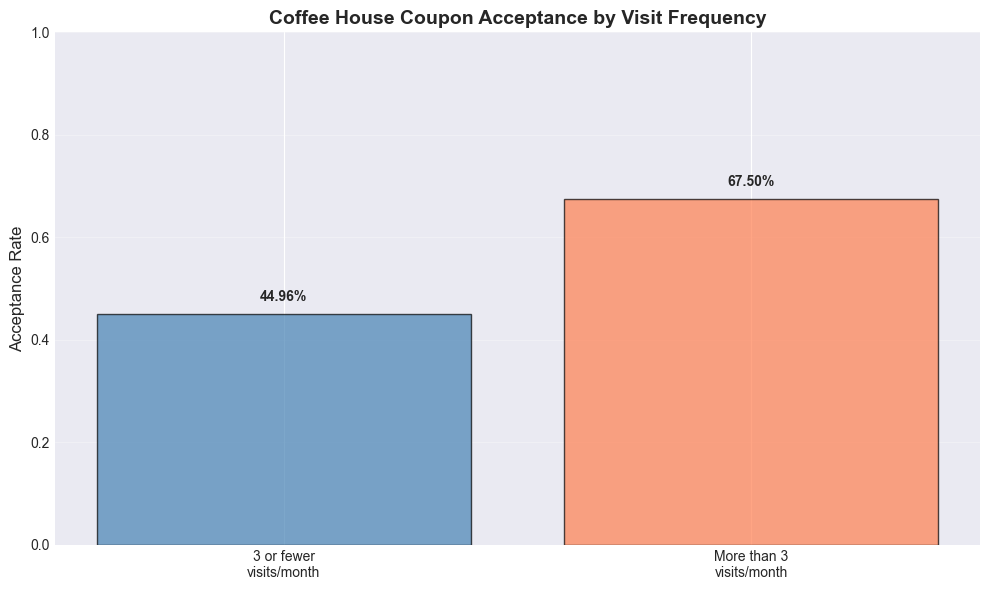

In [35]:
# Function to convert coffee house frequency to numeric
def coffee_freq_to_num(freq):
    """Convert coffee house frequency to numeric value"""
    if freq == 'never' or freq == '0':
        return 0
    elif freq == 'less1':
        return 0.5
    elif freq == '1~3':
        return 2
    elif freq == '4~8':
        return 6
    elif freq == 'gt8':
        return 10
    else:
        return 0

coffee_data['coffee_freq_numeric'] = coffee_data['CoffeeHouse'].apply(coffee_freq_to_num)
coffee_data['coffee_freq_more_than_1'] = coffee_data['coffee_freq_numeric'] > 1
coffee_data['coffee_freq_3_or_less'] = coffee_data['coffee_freq_numeric'] <= 3

# Compare acceptance by coffee house visit frequency
freq_3_or_less_coffee = coffee_data[coffee_data['coffee_freq_3_or_less']]
freq_more_than_3_coffee = coffee_data[~coffee_data['coffee_freq_3_or_less']]

rate_3_or_less_coffee = freq_3_or_less_coffee['Y'].mean()
rate_more_than_3_coffee = freq_more_than_3_coffee['Y'].mean()

print("Coffee House visits 3 or fewer times per month:")
print(f"  Count: {len(freq_3_or_less_coffee)}")
print(f"  Acceptance rate: {rate_3_or_less_coffee:.4f} ({rate_3_or_less_coffee*100:.2f}%)")

print("\nCoffee House visits more than 3 times per month:")
print(f"  Count: {len(freq_more_than_3_coffee)}")
print(f"  Acceptance rate: {rate_more_than_3_coffee:.4f} ({rate_more_than_3_coffee*100:.2f}%)")

print(f"\nDifference: {rate_more_than_3_coffee - rate_3_or_less_coffee:.4f} ({(rate_more_than_3_coffee - rate_3_or_less_coffee)*100:.2f} percentage points)")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['3 or fewer\nvisits/month', 'More than 3\nvisits/month']
rates = [rate_3_or_less_coffee, rate_more_than_3_coffee]
colors = ['steelblue', 'coral']
bars = ax.bar(categories, rates, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Acceptance Rate', fontsize=12)
ax.set_title('Coffee House Coupon Acceptance by Visit Frequency', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{rate:.2%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Coffee House Coupon Acceptance by Time of Day:
   Time  Count  Accepted  Acceptance_Rate
0  10AM    899       576         0.640712
1  10PM    297       126         0.424242
2   2PM    794       435         0.547859
3   6PM   1093       451         0.412626
4   7AM    913       407         0.445783

Coffee House Coupon Acceptance by Destination:
       Destination  Count  Accepted  Acceptance_Rate
0             Home    928       336         0.362069
1  No Urgent Place   2155      1252         0.580974
2             Work    913       407         0.445783

Coffee House Coupon Acceptance by Expiration:
  Expiration  Count  Accepted  Acceptance_Rate
0         1d   1769      1033         0.583946
1         2h   2227       962         0.431971


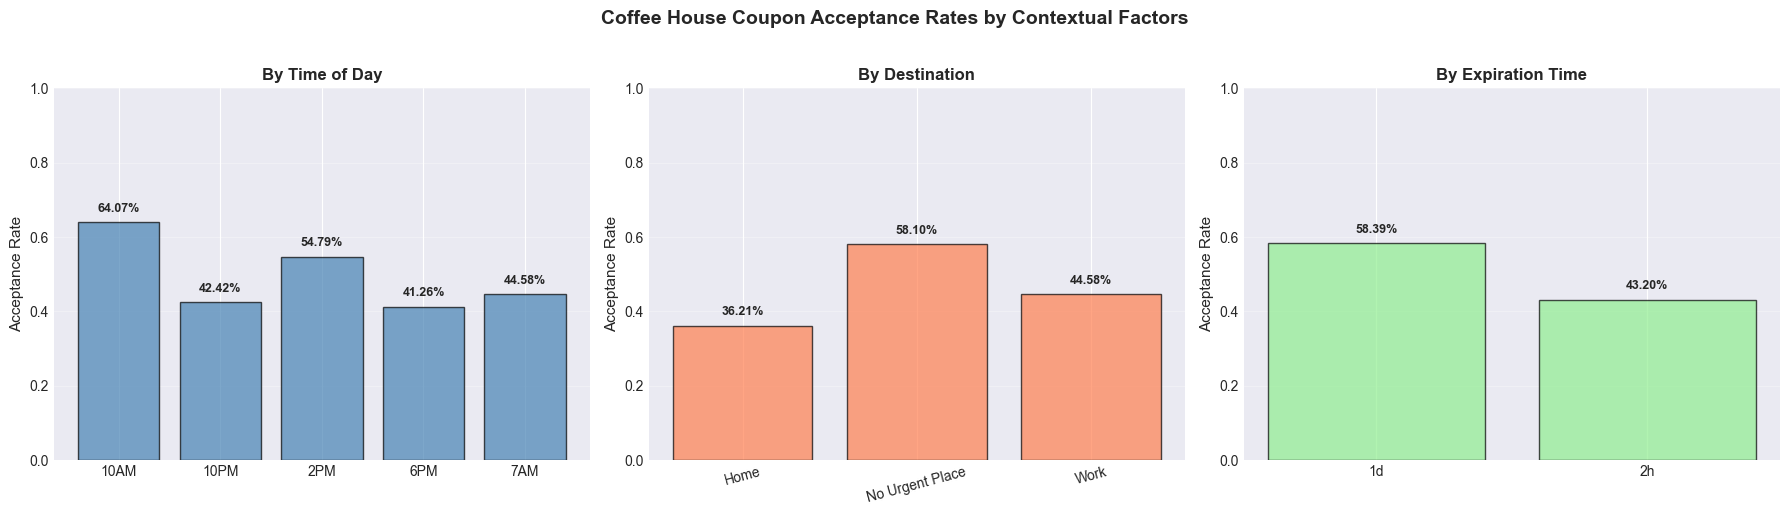

In [36]:
# Analyze acceptance rates by time of day
coffee_time_analysis = coffee_data.groupby('time')['Y'].agg(['count', 'sum', 'mean']).reset_index()
coffee_time_analysis.columns = ['Time', 'Count', 'Accepted', 'Acceptance_Rate']

print("Coffee House Coupon Acceptance by Time of Day:")
print(coffee_time_analysis)
print()

# Analyze by destination
coffee_dest_analysis = coffee_data.groupby('destination')['Y'].agg(['count', 'sum', 'mean']).reset_index()
coffee_dest_analysis.columns = ['Destination', 'Count', 'Accepted', 'Acceptance_Rate']

print("Coffee House Coupon Acceptance by Destination:")
print(coffee_dest_analysis)
print()

# Analyze by expiration time
coffee_exp_analysis = coffee_data.groupby('expiration')['Y'].agg(['count', 'sum', 'mean']).reset_index()
coffee_exp_analysis.columns = ['Expiration', 'Count', 'Accepted', 'Acceptance_Rate']

print("Coffee House Coupon Acceptance by Expiration:")
print(coffee_exp_analysis)

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Time of day
axes[0].bar(coffee_time_analysis['Time'], coffee_time_analysis['Acceptance_Rate'], 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Acceptance Rate', fontsize=11)
axes[0].set_title('By Time of Day', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
for i, (time, rate) in enumerate(zip(coffee_time_analysis['Time'], coffee_time_analysis['Acceptance_Rate'])):
    axes[0].text(i, rate + 0.02, f'{rate:.2%}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Destination
axes[1].bar(coffee_dest_analysis['Destination'], coffee_dest_analysis['Acceptance_Rate'], 
            color='coral', alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Acceptance Rate', fontsize=11)
axes[1].set_title('By Destination', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=15)
for i, (dest, rate) in enumerate(zip(coffee_dest_analysis['Destination'], coffee_dest_analysis['Acceptance_Rate'])):
    axes[1].text(i, rate + 0.02, f'{rate:.2%}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Expiration
axes[2].bar(coffee_exp_analysis['Expiration'], coffee_exp_analysis['Acceptance_Rate'], 
            color='lightgreen', alpha=0.7, edgecolor='black')
axes[2].set_ylabel('Acceptance Rate', fontsize=11)
axes[2].set_title('By Expiration Time', fontsize=12, fontweight='bold')
axes[2].set_ylim([0, 1])
axes[2].grid(axis='y', alpha=0.3)
for i, (exp, rate) in enumerate(zip(coffee_exp_analysis['Expiration'], coffee_exp_analysis['Acceptance_Rate'])):
    axes[2].text(i, rate + 0.02, f'{rate:.2%}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Coffee House Coupon Acceptance Rates by Contextual Factors', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Group 1: Coffee visits > 1/month AND going to work
  Count: 440
  Acceptance rate: 0.5909 (59.09%)

Group 2: Coffee visits > 1/month AND NOT going to work
  Count: 1482
  Acceptance rate: 0.6808 (68.08%)

Group 3: Coffee visits ≤ 1/month
  Count: 2074
  Acceptance rate: 0.3500 (35.00%)


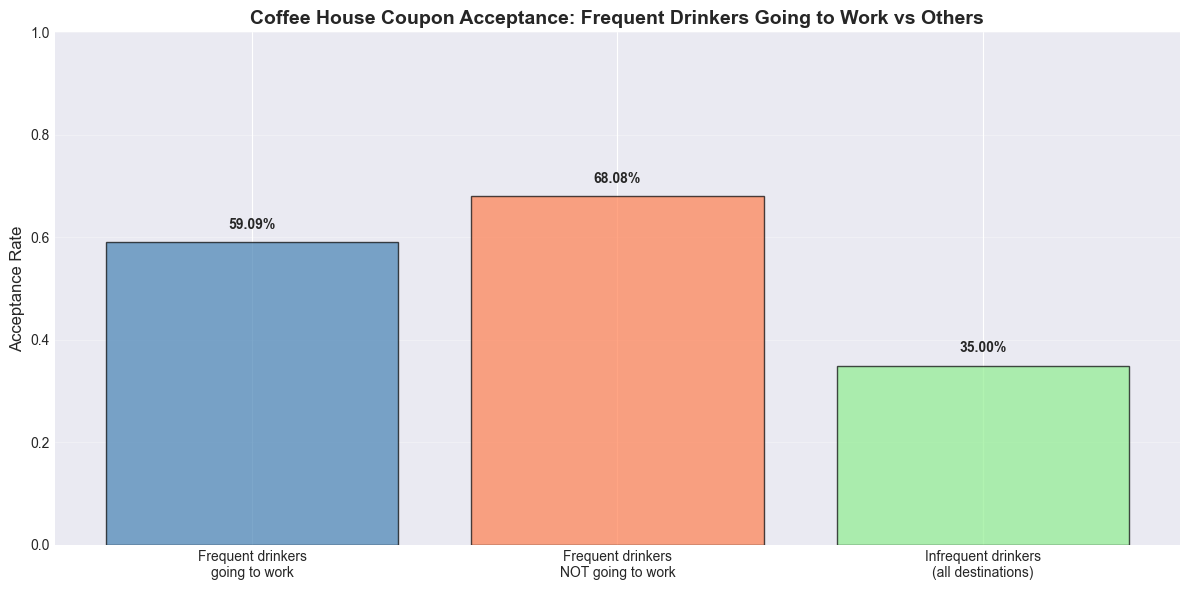


KEY FINDING: Drivers who frequently visit coffee houses and are
going to work have the HIGHEST acceptance rate for coffee house coupons!


In [37]:
# Compare acceptance rates: frequent coffee drinkers (>1/month) going to work vs others
coffee_data['age_numeric'] = coffee_data['age'].apply(age_to_num)
coffee_data['going_to_work'] = coffee_data['destination'] == 'Work'

# Group 1: Coffee visits > 1/month AND going to work
coffee_group1 = coffee_data[
    (coffee_data['coffee_freq_more_than_1']) & 
    (coffee_data['going_to_work'])
]

# Group 2: Coffee visits > 1/month AND NOT going to work
coffee_group2 = coffee_data[
    (coffee_data['coffee_freq_more_than_1']) & 
    (~coffee_data['going_to_work'])
]

# Group 3: All other coffee coupon recipients
coffee_group3 = coffee_data[~coffee_data['coffee_freq_more_than_1']]

rate_coffee1 = coffee_group1['Y'].mean()
rate_coffee2 = coffee_group2['Y'].mean()
rate_coffee3 = coffee_group3['Y'].mean()

print("Group 1: Coffee visits > 1/month AND going to work")
print(f"  Count: {len(coffee_group1)}")
print(f"  Acceptance rate: {rate_coffee1:.4f} ({rate_coffee1*100:.2f}%)")

print("\nGroup 2: Coffee visits > 1/month AND NOT going to work")
print(f"  Count: {len(coffee_group2)}")
print(f"  Acceptance rate: {rate_coffee2:.4f} ({rate_coffee2*100:.2f}%)")

print("\nGroup 3: Coffee visits ≤ 1/month")
print(f"  Count: {len(coffee_group3)}")
print(f"  Acceptance rate: {rate_coffee3:.4f} ({rate_coffee3*100:.2f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
groups = ['Frequent drinkers\ngoing to work', 'Frequent drinkers\nNOT going to work', 'Infrequent drinkers\n(all destinations)']
rates = [rate_coffee1, rate_coffee2, rate_coffee3]
colors = ['steelblue', 'coral', 'lightgreen']
bars = ax.bar(groups, rates, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Acceptance Rate', fontsize=12)
ax.set_title('Coffee House Coupon Acceptance: Frequent Drinkers Going to Work vs Others', 
             fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{rate:.2%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY FINDING: Drivers who frequently visit coffee houses and are")
print("going to work have the HIGHEST acceptance rate for coffee house coupons!")
print("="*60)


## Summary: What We Found

### Overall Patterns
1. **Overall acceptance rate**: About 57% of coupons get accepted - not bad!
2. **Bar coupons**: These have a lower acceptance rate than average. Bars are a specific thing, so that makes sense.
3. **Coffee house coupons**: These do really well, especially when the timing and context make sense.

### What We Learned About Bar Coupons
1. **Frequency is huge**: If someone goes to bars more than 3 times a month, they're way more likely to accept. Obvious but confirmed.
2. **No kids**: Bar coupons with kids in the car? Almost never accepted. Makes total sense.
3. **Age matters**: Younger drivers (under 30) who go to bars regularly are more likely to accept.
4. **It's a lifestyle thing**: The combo of regular bar visits, no kids, right age - that's what predicts acceptance.

### What We Learned About Coffee House Coupons
1. **Morning commute**: People heading to work who go to coffee shops regularly? Highest acceptance rate. Coffee is part of their routine.
2. **Time matters**: Morning hours work best for coffee coupons.
3. **Habit beats everything**: Regular coffee drinkers are likely to accept regardless, but work-bound trips win.

### What This Means

**For bar coupons:**
- Target people who go to bars regularly (more than 3 times/month)
- Make sure they're under 30 if possible
- NEVER send when kids are in the car
- Evening (6PM) seems to work best

**For coffee house coupons:**
- Focus on people heading to work
- Target regular coffee drinkers (more than once/month)
- Morning commute hours are golden (7AM-10AM)
- Longer expiration might help since they can't always stop immediately

**Big picture:**
The strongest predictor is visit frequency - if people already go somewhere, they'll probably accept a coupon. But context matters too - the right coupon at the right time with the right passengers makes all the difference.
